## Question 1

### (a)

In [1]:
import numpy as np

In [2]:
## classical gram schmidt algorithm 구현

def clgs(matrix):
    m = matrix.shape[0]
    n = matrix.shape[1]
    Q = np.zeros([m, n])
    R = np.zeros([n, n])
    for i in range(n):
        if i == 0:
            a_prime = matrix[:, i]
        else:
            R[:i-1, i] = np.dot(np.transpose(Q[:, :i-1]), matrix[:, i])
            a_prime = matrix[:, i] - np.dot(Q[:, :i-1], R[:i-1, i])
        R[i, i] = np.linalg.norm(a_prime)
        Q[:, i] = a_prime / R[i, i]
    return Q, R

In [3]:
## random 4 * 4 행렬 생성 후 분해

A = np.random.randn(4, 4)
Q, R = clgs(A)
print(A)
print(Q)
print(R)

[[ 2.3936383  -0.88694734 -1.56415371 -0.76358037]
 [-0.86143727  1.56348805  1.5719911   0.44922917]
 [-0.25730558 -0.42675025  1.95560825 -0.13205569]
 [ 0.15208535 -0.33427853 -0.65223035  0.55983063]]
[[ 0.9344936  -0.47240722  0.25115598  0.35782679]
 [-0.3363113   0.83274735  0.40114286 -0.43121052]
 [-0.10045395 -0.22729636  0.84369647 -0.071583  ]
 [ 0.05937521 -0.17804393 -0.25334037  0.82516262]]
[[ 2.56142823  0.         -2.2255449  -0.81813624]
 [ 0.          1.87750589  0.          0.66515661]
 [ 0.          0.          2.0529225   0.        ]
 [ 0.          0.          0.          0.88083819]]


In [4]:
## A = QR 확인

np.matmul(Q, R)

array([[ 2.3936383 , -0.88694734, -1.56415371, -0.76358037],
       [-0.86143727,  1.56348805,  1.5719911 ,  0.44922917],
       [-0.25730558, -0.42675025,  1.95560825, -0.13205569],
       [ 0.15208535, -0.33427853, -0.65223035,  0.55983063]])

In [5]:
## Q^t * Q = I 확인(round off error 상당히 발생)

np.matmul(np.transpose(Q), Q)

array([[ 1.00000000e+00, -7.09262452e-01,  5.55111512e-17,
         5.35592824e-01],
       [-7.09262452e-01,  1.00000000e+00,  6.87393322e-02,
        -6.58774022e-01],
       [ 5.55111512e-17,  6.87393322e-02,  1.00000000e+00,
        -3.52548006e-01],
       [ 5.35592824e-01, -6.58774022e-01, -3.52548006e-01,
         1.00000000e+00]])

In [6]:
## modified gram schmidt algoritgm 구현

def mgs(matrix):
    m = matrix.shape[0]
    n = matrix.shape[1]
    Q = matrix.copy()
    R = np.zeros([n, n])
    for i in range(n-1):
        R[i, i] = np.linalg.norm(matrix[:, i])
        Q[:, i] = Q[:, i] / R[i, i]
        R[i, i+1:] = np.dot(np.transpose(Q[:, i]), Q[:, i+1:])
        Q[:, i+1:] = Q[:, i+1:] - np.outer(Q[:, i], R[i, i+1:])
    R[n-1, n-1] = np.linalg.norm(Q[:, n-1])
    Q[:, n-1] = Q[:, n-1] / R[n-1, n-1]
    return Q, R

In [7]:
## random 4 * 4 행렬 생성 후 분해

A = np.random.randn(4, 4)
Q, R = mgs(A)
print(A)
print(Q)
print(R)

[[ 0.57484988  1.01744617 -1.38343549 -0.01907287]
 [ 0.64541023 -0.02160519 -0.50538402  0.58176781]
 [ 1.66610126 -0.54791733 -1.43878924 -0.22855083]
 [-1.08257604 -0.49087574  0.28541308  1.88376683]]
[[ 0.26530328  0.79177475 -0.25990949  0.38544904]
 [ 0.29786811 -0.03794663  0.00137213  0.60768013]
 [ 0.76893488 -0.48987942 -0.15018055  0.07979878]
 [-0.49962778 -0.35612117 -0.36832457  0.68977247]]
[[ 2.16676511  0.08743872 -1.76650328 -0.94869296]
 [ 0.          1.25572126 -0.47300006 -0.59606445]
 [ 0.          0.          2.0786731  -0.65441588]
 [ 0.          0.          0.          1.38663822]]


In [8]:
## A = QR 확인

np.matmul(Q, R)

array([[ 0.57484988,  1.01744617, -1.38343549, -0.01907287],
       [ 0.64541023, -0.02160519, -0.50538402,  0.58176781],
       [ 1.66610126, -0.54791733, -1.43878924, -0.22855083],
       [-1.08257604, -0.49087574,  0.28541308,  1.88376683]])

In [9]:
## Q^t * Q = I 확인(대각 성분 오차 심하게 발생)

np.matmul(Q.T, Q)

array([[ 1.00000000e+00,  0.00000000e+00,  3.05311332e-16,
         2.22044605e-16],
       [ 0.00000000e+00,  9.95151347e-01, -1.10330629e-03,
        -2.60495541e-03],
       [ 3.05311332e-16, -1.10330629e-03,  2.25772011e-01,
        -3.65392415e-01],
       [ 2.22044605e-16, -2.60495541e-03, -3.65392415e-01,
         1.00000000e+00]])

In [10]:
## 연습문제 3-2(a)에 있는 code 구현

U, X = np.linalg.qr(np.random.randn(80, 80))
V, X = np.linalg.qr(np.random.randn(80, 80))
S = np.diag(np.array([2 ** (-i-1) for i in range(80)]))
A = np.matmul(U, np.matmul(S, V))
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)

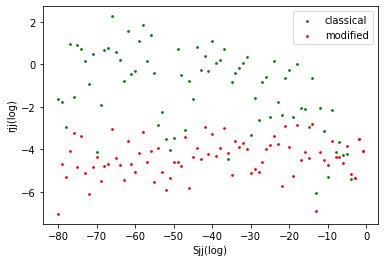

In [11]:
## 두 방법 비교 plot, result : modified algorithm is more numerically stable.

import matplotlib.pyplot as plt
%matplotlib inline

x = np.log2(np.diag(S))
y1 = np.log2(np.abs(np.diag(Rc)))
y2 = np.log2(np.abs(np.diag(Rm)))
plt.scatter(x, y1, s = 3, c = 'g', label = 'classical')
plt.scatter(x, y2, s = 3, c = 'r', label = 'modified')
plt.xlabel('Sjj(log)')
plt.ylabel('rjj(log)')
plt.legend()
plt.show()

### (b)

In [12]:
## qrhouse, formQ 구현

def qrhouse(matrix):
    m = matrix.shape[0]
    n = matrix.shape[1]
    R = matrix.copy()
    V = np.zeros([m, n])
    for i in range(min(m-1, n)):
        x = R[i:, i]
        v = x + np.sign(x[0]) * np.linalg.norm(x) * np.eye(len(x))[0]
        V[i:, i] = v
        R[i:, i:] = R[i:, i:] - np.outer(2*v, np.matmul(np.transpose(v), R[i:, i:])) / np.dot(np.transpose(v), v)
    return V, np.triu(R[:n,:n])

def formQ(V):
    m = V.shape[0]
    n = V.shape[1]
    Q = np.eye(m)
    for i in range(min(m-1, n)-1, -1, -1):
        v = V[:,i]
        Q = Q - np.outer(2*v, np.matmul(np.transpose(v), Q)) /  np.dot(np.transpose(v), v)
    return Q

In [13]:
## random 4 * 4 행렬 생성 후 분해

A = np.random.randn(4, 4)
V, R = qrhouse(A)
Q = formQ(V)
print(A)
print(Q)
print(R)

[[ 0.01920444  0.71651368 -0.23015456 -0.24266517]
 [ 0.93428578 -0.19619948 -1.19149163 -0.2220908 ]
 [ 0.57869778 -0.20282826 -0.19521136 -0.03341559]
 [ 0.80432695 -1.1955275   1.19494133 -0.99968743]]
[[-0.01409999  0.67092537  0.7019462  -0.23860401]
 [-0.68595724  0.39789388 -0.50826006 -0.3358792 ]
 [-0.42488278  0.17167571  0.12643025  0.87978263]
 [-0.59054083 -0.60172009  0.48265789 -0.23714093]]
[[-1.36201751  0.91666766  0.19783779  0.76032033]
 [ 0.          1.08721286 -1.38103701  0.34461658]
 [ 0.          0.          0.99609873 -0.54418978]
 [ 0.          0.          0.          0.34016491]]


In [14]:
## A = QR 확인

np.matmul(Q, R)

array([[ 0.01920444,  0.71651368, -0.23015456, -0.24266517],
       [ 0.93428578, -0.19619948, -1.19149163, -0.2220908 ],
       [ 0.57869778, -0.20282826, -0.19521136, -0.03341559],
       [ 0.80432695, -1.1955275 ,  1.19494133, -0.99968743]])

In [15]:
## Q^t * Q = I 확인(round off error 눈에 띄게 감소)

np.matmul(np.transpose(Q), Q)

array([[ 1.00000000e+00,  4.16333634e-17, -1.38777878e-17,
         0.00000000e+00],
       [ 4.16333634e-17,  1.00000000e+00,  3.88578059e-16,
         5.20417043e-18],
       [-1.38777878e-17,  3.88578059e-16,  1.00000000e+00,
         1.38777878e-17],
       [ 0.00000000e+00,  5.20417043e-18,  1.38777878e-17,
         1.00000000e+00]])

In [16]:
## 연습문제 3.2(b) 코드 작성, qrhouse가 훨씬 numerically stable한 것을 확인(built-in 함수와 비교)

A = np.array([[0.70000, 0.70711], [0.70001, 0.70711]])
Qm, Rm = mgs(A)
V, R = qrhouse(A)
Q = formQ(V)
Qt, Rt = np.linalg.qr(A)
print("Built-in function's value : ", np.linalg.norm(np.outer(np.transpose(Qt), Qt - np.eye(2))))
print("QRhouse value : ", np.linalg.norm(np.outer(np.transpose(Q), Q - np.eye(2))))
print("Modified-gs value : ", np.linalg.norm(np.outer(np.transpose(Qm), Qm - np.eye(2))))

Built-in function's value :  2.82842712474619
QRhouse value :  2.8284271247461903
Modified-gs value :  2.828427124734683


## Question 2

In [17]:
## 기븐스 회전 행렬 G를 찾는 함수

def find_G(matrix, i, k):
    dim = matrix.shape[0]
    G = np.eye(dim)
    sin = np.sqrt((matrix[i][k] ** 2) / ((matrix[k][k] ** 2) + (matrix[i][k] ** 2))) ## 곱해서 원하는 성분을 0으로 만드는 sin, cos 찾기
    cos = np.sqrt(1 - (sin ** 2))
    G[i][i] = cos
    G[i][k] = -sin
    G[k][i] = sin
    G[k][k] = cos
    if(abs(sin * matrix[k][k] + cos * matrix[i][k]) < 10 ** -6): ## sin, -sin 부호 결정 부분
        G[i][k] = G[i][k] * -1
        G[k][i] = G[k][i] * -1
    return G

In [18]:
## 기븐스 회전을 이용한 QR분해 함수

def givens_QR(matrix):
    m = matrix.shape[0]
    n = matrix.shape[1]
    Q = np.eye(m)
    R = matrix.copy()
    for k in range(n-1):
        for i in range(m-1, k, -1):
            G = find_G(R, i, k)
            Q = np.matmul(Q, np.transpose(G))
            R = np.matmul(G, R)
    return Q, R

In [19]:
## random 4 * 4 행렬 생성 후 분해 (R에서 하삼각 성분들 round off error 존재)

A = np.random.randn(4, 4)
Q, R = givens_QR(A)
print(A)
print(Q)
print(R)

[[-1.46915169 -0.91213443 -1.13550411 -1.29691586]
 [-1.36294047 -0.18045811  1.70943861 -1.31050291]
 [ 0.19540101  0.14816546  1.30639123 -1.39540862]
 [ 1.07982504  0.60582604  2.46374956 -0.40951594]]
[[ 0.64301685 -0.52916732  0.53029914  0.15904119]
 [ 0.59653044  0.79708042  0.04782338  0.08079094]
 [-0.08552292  0.12232561  0.48430838 -0.86207173]
 [-0.47261675  0.26397198  0.69421981  0.4743533 ]]
[[-2.28477944e+00 -9.93161645e-01 -9.86551835e-01 -1.30281012e+00]
 [ 1.93453424e-16  5.16877630e-01  2.77359765e+00 -6.37085663e-01]
 [ 1.31711328e-16 -1.53961571e-18  1.82267425e+00 -1.71052819e+00]
 [ 8.63294823e-17  2.53834351e-18  3.31945957e-16  6.96547281e-01]]


In [20]:
## A = QR 확인

np.matmul(Q, R)

array([[-1.46915169, -0.91213443, -1.13550411, -1.29691586],
       [-1.36294047, -0.18045811,  1.70943861, -1.31050291],
       [ 0.19540101,  0.14816546,  1.30639123, -1.39540862],
       [ 1.07982504,  0.60582604,  2.46374956, -0.40951594]])

In [21]:
## Q^t * Q = I 확인

np.matmul(np.transpose(Q), Q)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.55111512e-17],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         5.55111512e-17],
       [-5.55111512e-17,  0.00000000e+00,  5.55111512e-17,
         1.00000000e+00]])

In [22]:
## built-in code와 결과 비교 (부호 산정방식이 달라서 -1배의 차이는 존재할 수도 있음)

Q, R = np.linalg.qr(A)
print(Q)
print(R)

[[-0.64301685  0.52916732 -0.53029914  0.15904119]
 [-0.59653044 -0.79708042 -0.04782338  0.08079094]
 [ 0.08552292 -0.12232561 -0.48430838 -0.86207173]
 [ 0.47261675 -0.26397198 -0.69421981  0.4743533 ]]
[[ 2.28477944  0.99316164  0.98655184  1.30281012]
 [ 0.         -0.51687763 -2.77359765  0.63708566]
 [ 0.          0.         -1.82267425  1.71052819]
 [ 0.          0.          0.          0.69654728]]


## Question 3

### (a)

In [23]:
## random matrix 생성, size 마다 행렬 100개 생성 후, 각 행렬의 eigenvalue의 real부분의 분포 비교

evals = [[],[],[],[],[],[]]

## matrix size 8, 16, 32, 64, 128, 256일 때 실험

for n in range(3, 9):
    for i in range(100):
        evals[n-3] = evals[n-3] + (list(np.real(np.linalg.eigvals(np.random.randn(2**n,2**n)/np.sqrt(2**n)))))

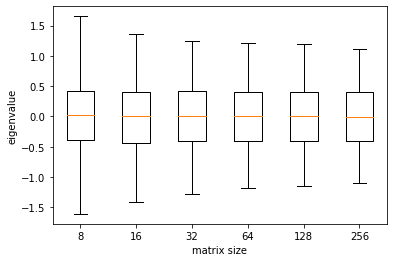

In [24]:
## box plot으로 matrix size 별로 분포 확인, 평균은 거의 0에 가까운 정도로 동일, 표준편차가 아주 약간씩 감소하는 것 같기는 함.
## 그러나 size가 커져도 Q3, Q1은 큰 차이가 없었음.

plt.boxplot(evals)
plt.xticks([1, 2, 3, 4, 5, 6], [2 ** i for i in range(3, 9)])
plt.xlabel('matrix size')
plt.ylabel('eigenvalue')
plt.show()

In [25]:
## random matrix 생성, size 마다 행렬 100개 생성 후, 각 행렬의 spectral radius 비교

spec_rad = [[],[],[],[],[],[]]

## matrix size 8, 16, 32, 64, 128, 256일 때 실험

for n in range(3, 9):
    for i in range(100):
        spec_rad[n-3].append(np.max(np.abs(np.linalg.eigvals(np.random.randn(2**n,2**n)/np.sqrt(2**n)))))

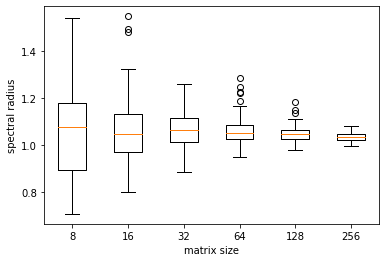

In [26]:
## matrix size가 커져도 spectral radius의 평균은 1 근처에서 형성되는 것을 확인, 다만 size가 클 수록 1에 더 근접하게 spectral radius가
## 나타나는 것을 볼 수 있었음.(랜덤 행렬에서의 편차가 점점 작아짐.)

plt.boxplot(spec_rad)
plt.xticks([1, 2, 3, 4, 5, 6], [2 ** i for i in range(3, 9)])
plt.xlabel('matrix size')
plt.ylabel('spectral radius')
plt.show()

### (b)

In [27]:
## random matrix 생성, size 마다 행렬 100개 생성 후, 각 행렬의 2-norm 비교

norm2 = [[],[],[],[],[],[]]

## matrix size 8, 16, 32, 64, 128, 256일 때 실험

for n in range(3, 9):
    for i in range(100):
        norm2[n-3].append(np.linalg.norm(np.random.randn(2**n,2**n)/np.sqrt(2**n), ord = 2))

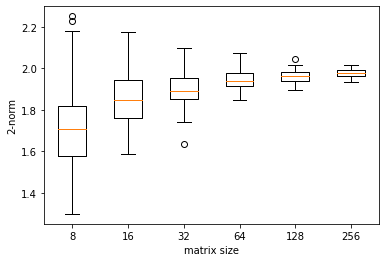

In [28]:
## 2-norm의 평균은 점점 증가하는 경향을 보임, 편차도 점점 줄어드는 듯 보임, matrix size가 클수록 약 2정도에 수렴하는 느낌으로도 관찰됨.

plt.boxplot(norm2)
plt.xticks([1, 2, 3, 4, 5, 6], [2 ** i for i in range(3, 9)])
plt.xlabel('matrix size')
plt.ylabel('2-norm')
plt.show()

In [29]:
## (a) 문제와 (b) 문제의 plot을 보았을 때, spectral radius와 2-norm이 같은 값으로 수렴하는 듯 해보이지는 않았음.
## 자세한 확인을 위하여 2-norm - spectral radius의 차이를 matrix size 마다 비교

diff = [[],[],[],[],[],[]]

## matrix size 8, 16, 32, 64, 128, 256일 때 실험

for n in range(3, 9):
    for i in range(100):
        M = np.random.randn(2**n,2**n)/np.sqrt(2**n)
        diff[n-3].append(np.linalg.norm(M, ord = 2) - np.max(np.abs(np.linalg.eigvals(M))))

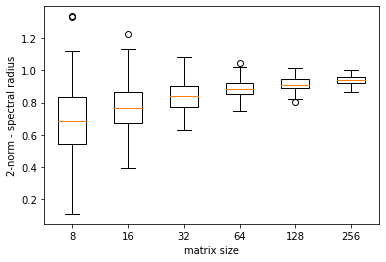

In [30]:
## 위의 plot에서 예상했던 것 처럼 두 값의 차이가 0으로 수렴하는 것이 아니었음. 다만 matrix size가 커질 수록
## 1 근처 값으로 점점 랜덤 행렬 간의 편차가 작게 다가가는 것까지는 확인할 수 있었음

plt.boxplot(diff)
plt.xticks([1, 2, 3, 4, 5, 6], [2 ** i for i in range(3, 9)])
plt.xlabel('matrix size')
plt.ylabel('2-norm - spectral radius')
plt.show()

### (c)

In [31]:
## random matrix 생성, size 마다 행렬 100개 생성 후, 각 행렬의 2-norm 비교

min_sing_val = [[],[],[],[],[],[],[],[]]

## matrix size 2, 4, 8, 16, 32, 64, 128, 256일 때 실험

for n in range(1, 9):
    for i in range(100):
        min_sing_val[n-1].append(np.min(np.linalg.svd(np.random.randn(2**n,2**n)/np.sqrt(2**n))[1]))

In [32]:
## 2^-m 과 minimum singular value 비교, minimum singular value가 2^-m 보다는 보통 작게 나타나는 것으로 보임

for n in range(1, 9):
    print("When matrix size is %d * %d, the average value of smallest singular value among random 100 matrices is\n\
          %.5f, it is less than %.5f.\n"%(2**n, 2**n, np.mean(min_sing_val[n-1]), 2**(-n)))

When matrix size is 2 * 2, the average value of smallest singular value among random 100 matrices is
          0.31408, it is less than 0.50000.

When matrix size is 4 * 4, the average value of smallest singular value among random 100 matrices is
          0.18351, it is less than 0.25000.

When matrix size is 8 * 8, the average value of smallest singular value among random 100 matrices is
          0.08290, it is less than 0.12500.

When matrix size is 16 * 16, the average value of smallest singular value among random 100 matrices is
          0.04558, it is less than 0.06250.

When matrix size is 32 * 32, the average value of smallest singular value among random 100 matrices is
          0.02111, it is less than 0.03125.

When matrix size is 64 * 64, the average value of smallest singular value among random 100 matrices is
          0.01027, it is less than 0.01562.

When matrix size is 128 * 128, the average value of smallest singular value among random 100 matrices is
          0.0

In [33]:
## tail을 확인하기 위해서 표준편차를 들여다 봄, matrix size가 커질 수록 minimum singular value의 표준편차도 점점 작아지는 것 같았음

for i in range(1, 9):
    print("Matrix size : %d, std of minimum singular value : %.5f."%(2**i, np.std(min_sing_val[i-1])))

Matrix size : 2, std of minimum singular value : 0.24241.
Matrix size : 4, std of minimum singular value : 0.13948.
Matrix size : 8, std of minimum singular value : 0.06309.
Matrix size : 16, std of minimum singular value : 0.03210.
Matrix size : 32, std of minimum singular value : 0.01548.
Matrix size : 64, std of minimum singular value : 0.00916.
Matrix size : 128, std of minimum singular value : 0.00415.
Matrix size : 256, std of minimum singular value : 0.00185.


### (d)

In [34]:
## random matrix 생성, size 마다 행렬 100개 생성 후, 각 행렬의 eigenvalue의 real부분의 분포 비교, upper trianular matrix로 실험

evals_u = [[],[],[],[],[],[]]

## matrix size 8, 16, 32, 64, 128, 256일 때 실험

for n in range(3, 9):
    for i in range(100):
        evals_u[n-3] = evals_u[n-3] + (list(np.real(np.linalg.eigvals(np.triu(np.random.randn(2**n,2**n)/np.sqrt(2**n))))))

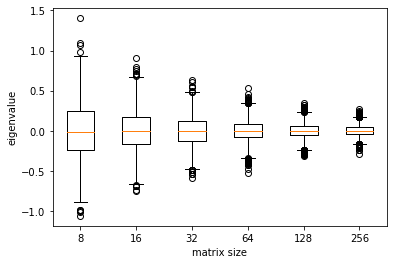

In [35]:
## (a) 문제와는 다르게 matrix size가 커질 수록 eigenvalue의 편차가 매우 작아졌음, 평균이 0 근처인 것은 동일

plt.boxplot(evals_u)
plt.xticks([1, 2, 3, 4, 5, 6], [2 ** i for i in range(3, 9)])
plt.xlabel('matrix size')
plt.ylabel('eigenvalue')
plt.show()

In [36]:
spec_rad_u = [[],[],[],[],[],[]]

for n in range(3, 9):
    for i in range(100):
        spec_rad_u[n-3].append(np.max(np.abs(np.linalg.eigvals(np.triu(np.random.randn(2**n,2**n)/np.sqrt(2**n))))))

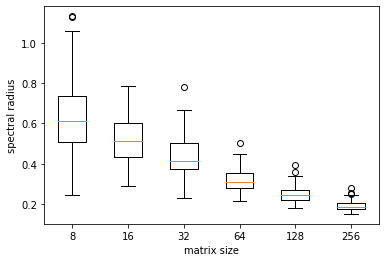

In [37]:
## spectral norm이 위 full matrix일 때 보다 훨씬 작은 값으로 분포됨, 또한 matrix size가 커질수록 점점 작아지는 경향도 관찰

plt.boxplot(spec_rad_u)
plt.xticks([1, 2, 3, 4, 5, 6], [2 ** i for i in range(3, 9)])
plt.xlabel('matrix size')
plt.ylabel('spectral radius')
plt.show()

In [38]:
norm2_u = [[],[],[],[],[],[]]

for n in range(3, 9):
    for i in range(100):
        norm2_u[n-3].append(np.linalg.norm(np.triu(np.random.randn(2**n,2**n)/np.sqrt(2**n)), ord = 2))

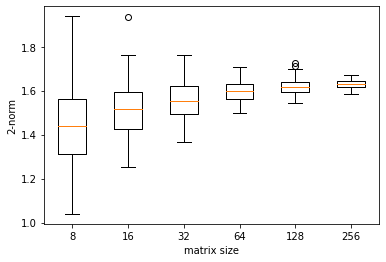

In [39]:
## 이번에는 분포나 편차의 양상이 비슷해보이나 full matrix일 때 보다 작은 값을 가지는 것을 관찰할 수 있었음

plt.boxplot(norm2_u)
plt.xticks([1, 2, 3, 4, 5, 6], [2 ** i for i in range(3, 9)])
plt.xlabel('matrix size')
plt.ylabel('2-norm')
plt.show()

In [40]:
diff_u = [[],[],[],[],[],[]]

for n in range(3, 9):
    for i in range(100):
        M = np.triu(np.random.randn(2**n,2**n)/np.sqrt(2**n))
        diff_u[n-3].append(np.linalg.norm(M, ord = 2) - np.max(np.abs(np.linalg.eigvals(M))))

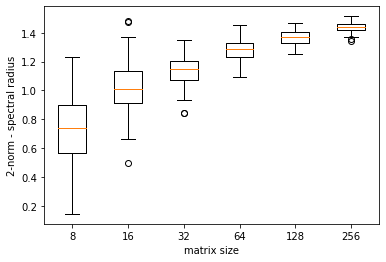

In [41]:
## 이 경우도 2-norm과 spectral radius는 수렴하지 않음, 심지어 차이가 더 커지는 양상이 더 확연하게 나타남

plt.boxplot(diff_u)
plt.xticks([1, 2, 3, 4, 5, 6], [2 ** i for i in range(3, 9)])
plt.xlabel('matrix size')
plt.ylabel('2-norm - spectral radius')
plt.show()

In [42]:
min_sing_val_u = [[],[],[],[],[],[],[],[]]
for n in range(1, 9):
    for i in range(100):
        min_sing_val_u[n-1].append(np.min(np.linalg.svd(np.triu(np.random.randn(2**n,2**n)/np.sqrt(2**n)))[1]))

In [43]:
## full matrix와 동일하게 2^-m보다는 평균 minimum singular value가 작게 나타나는 경향 유지
## 그러면서도 size가 커질수록 아주 빠르게 0으로 떨어지는 것 관찰

for n in range(1, 9):
    print("When matrix size is %d * %d, the average value of smallest singular value among random 100 matrices is\n\
          %.5f, it is less than %.5f.\n"%(2**n, 2**n, np.mean(min_sing_val_u[n-1]), 2**(-n)))

When matrix size is 2 * 2, the average value of smallest singular value among random 100 matrices is
          0.29572, it is less than 0.50000.

When matrix size is 4 * 4, the average value of smallest singular value among random 100 matrices is
          0.04846, it is less than 0.25000.

When matrix size is 8 * 8, the average value of smallest singular value among random 100 matrices is
          0.00462, it is less than 0.12500.

When matrix size is 16 * 16, the average value of smallest singular value among random 100 matrices is
          0.00007, it is less than 0.06250.

When matrix size is 32 * 32, the average value of smallest singular value among random 100 matrices is
          0.00000, it is less than 0.03125.

When matrix size is 64 * 64, the average value of smallest singular value among random 100 matrices is
          0.00000, it is less than 0.01562.

When matrix size is 128 * 128, the average value of smallest singular value among random 100 matrices is
          0.0

In [44]:
## 표준편차도 full matrix일 때 보다 훨씬 작게 나타남(size가 커지면 0이 많이 나오는 듯)

for i in range(1, 9):
    print("Matrix size : %d, std of minimum singular value : %.5f."%(2**i, np.std(min_sing_val_u[i-1])))

Matrix size : 2, std of minimum singular value : 0.25356.
Matrix size : 4, std of minimum singular value : 0.05408.
Matrix size : 8, std of minimum singular value : 0.01018.
Matrix size : 16, std of minimum singular value : 0.00018.
Matrix size : 32, std of minimum singular value : 0.00000.
Matrix size : 64, std of minimum singular value : 0.00000.
Matrix size : 128, std of minimum singular value : 0.00000.
Matrix size : 256, std of minimum singular value : 0.00000.


## Question 4

In [45]:
## t = 1로 설정

m_vec = np.linspace(0, 1, 50)
A = np.vander(m_vec, 12)
A = np.fliplr(A)
A

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.04081633e-02, 4.16493128e-04, 8.49985975e-06,
        1.73466526e-07, 3.54013317e-09, 7.22476158e-11, 1.47444114e-12,
        3.00906355e-14, 6.14094602e-16, 1.25325429e-17, 2.55766182e-19],
       [1.00000000e+00, 4.08163265e-02, 1.66597251e-03, 6.79988780e-05,
        2.77546441e-06, 1.13284262e-07, 4.62384741e-09, 1.88728466e-10,
        7.70320269e-12, 3.14416436e-13, 1.28333239e-14, 5.23809140e-16],
       [1.00000000e+00, 6.12244898e-02, 3.74843815e-03, 2.29496213e-04,
        1.40507886e-05, 8.60252361e-07, 5.26685119e-08, 3.22460277e-09,
        1.97424659e-10, 1.20872240e-11, 7.40034125e-13, 4.53082118e-14],
       [1.00000000e+00, 8.16326531e-02, 6.66389005e-03, 5.43991024e-04,
        4.44074305e-05, 3.62509637e-06, 2.95926234e-07, 2.41

In [46]:
b = np.array([np.cos(4*i) for i in range(50)])
b

array([ 1.        , -0.65364362, -0.14550003,  0.84385396, -0.95765948,
        0.40808206,  0.42417901, -0.96260587,  0.83422336, -0.12796369,
       -0.66693806,  0.99984331, -0.64014434, -0.16299078,  0.85322011,
       -0.95241298,  0.39185723,  0.44014302, -0.96725059,  0.82433133,
       -0.11038724, -0.6800235 ,  0.99937328, -0.62644445, -0.18043045,
        0.86231887, -0.94686801,  0.3755096 ,  0.4559691 , -0.97159219,
        0.81418097, -0.0927762 , -0.69289582,  0.99859007, -0.61254824,
       -0.19781357,  0.8711474 , -0.94102631,  0.35904429,  0.47165229,
       -0.97562931,  0.80377546, -0.07513609, -0.70555101,  0.99749392,
       -0.59846007, -0.21513471,  0.87970293, -0.93488971,  0.34246646])

### (a)

In [47]:
import warnings 
warnings.filterwarnings('ignore')

value = []

In [48]:
## built-in 함수를 이용하여 바로 최소 자승해 구해보기

x = np.linalg.lstsq(A, b)[0]
value.append(x)
x

array([ 8.01268368e-01, -7.22934667e+01,  1.78069905e+03, -2.00177404e+04,
        1.24867055e+05, -4.75986254e+05,  1.16522169e+06, -1.86852324e+06,
        1.95085439e+06, -1.27626304e+06,  4.74611386e+05, -7.64733383e+04])

### (b)

In [49]:
## 1번 문제에서 만든 함수를 사용한 QR 분해(dimension이 커져서 round-off error가 막대해진 것으로 추정)

Q, R = mgs(A)
Q

array([[ 1.41421356e-01, -1.21854359e-01, -6.47724460e-02,
        -3.12439457e-02, -1.43191375e-02, -4.79940501e-03,
         8.07567592e-04,  4.14980870e-03,  6.10964294e-03,
         7.19746113e-03,  7.72395422e-03,  2.61934979e-02],
       [ 1.41421356e-01, -1.16880712e-01, -6.62800847e-02,
        -3.25303826e-02, -1.53082987e-02, -5.55501886e-03,
         2.34635212e-04,  3.72043295e-03,  5.79355407e-03,
         6.97111274e-03,  7.56892498e-03,  2.58672539e-02],
       [ 1.41421356e-01, -1.11907065e-01, -6.75282602e-02,
        -3.38753761e-02, -1.63648382e-02, -6.36738732e-03,
        -3.85007957e-04,  3.25290364e-03,  5.44652111e-03,
         6.71987507e-03,  7.39408726e-03,  2.54893755e-02],
       [ 1.41421356e-01, -1.06933417e-01, -6.85169725e-02,
        -3.52603166e-02, -1.74903428e-02, -7.24037450e-03,
        -1.05495133e-03,  2.74410300e-03,  5.06586696e-03,
         6.44146302e-03,  7.19750102e-03,  2.50544227e-02],
       [ 1.41421356e-01, -1.01959770e-01, -6.9246221

In [50]:
R

array([[7.07106781, 3.53553391, 2.38107386, 1.80384383, 1.45760198,
        1.22685422, 1.06210305, 0.93859972, 0.84259493, 0.7658391 ,
        0.70308246, 0.6508252 ],
       [0.        , 4.10325903, 1.05690005, 0.95759283, 0.8582856 ,
        0.77319466, 0.70232002, 0.64329226, 0.593742  , 0.55173063,
        0.51575034, 0.4846413 ],
       [0.        , 0.        , 3.21042091, 0.81503687, 0.76592859,
        0.71385687, 0.66524918, 0.62165004, 0.58305332, 0.548981  ,
        0.5188549 , 0.49212416],
       [0.        , 0.        , 0.        , 2.7404749 , 0.54370214,
        0.52660797, 0.50529308, 0.48314593, 0.46163202, 0.44135713,
        0.42252822, 0.40516525],
       [0.        , 0.        , 0.        , 0.        , 2.44091088,
        0.41157975, 0.4066537 , 0.39785427, 0.38724038, 0.37593038,
        0.36453883, 0.35340136],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        2.22969589, 0.33249699, 0.33267103, 0.32967181, 0.32481523,
        0.31890825,

In [51]:
x = np.matmul(np.matmul(np.linalg.inv(R), np.transpose(Q)), b)
value.append(x)
x

array([ 0.02108593, -0.0113263 , -0.00915658, -0.00745627, -0.00630659,
       -0.00540608, -0.00459611, -0.0037926 , -0.00295047, -0.00204528,
       -0.00106398,  0.03040141])

### (c)

In [52]:
## 1번 문제에서 만든 함수를 사용한 QR 분해(dimension이 커져서 round-off error가 막대해진 것으로 추정)

Q, R = qrhouse(A)
Q

array([[ 8.07106781e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -2.50012498e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -3.97234002e-01,  6.32565379e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -3.76825839e-01,  6.70150774e-02,
        -1.45750357e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -3.56417675e-01,  5.0526766

In [53]:
R

array([[-7.07106781e+00, -3.53553391e+00, -2.38107386e+00,
        -1.80384383e+00, -1.45760198e+00, -1.22685422e+00,
        -1.06210305e+00, -9.38599722e-01, -8.42594935e-01,
        -7.65839095e-01, -7.03082461e-01, -6.50825202e-01],
       [ 0.00000000e+00,  2.08248282e+00,  2.08248282e+00,
         1.88681096e+00,  1.69113911e+00,  1.52347859e+00,
         1.38382940e+00,  1.26752296e+00,  1.16989067e+00,
         1.08711277e+00,  1.01621835e+00,  9.54922064e-01],
       [ 0.00000000e+00,  0.00000000e+00, -5.48229004e-01,
        -8.22343506e-01, -9.44453060e-01, -9.90560140e-01,
        -9.98303940e-01, -9.86504057e-01, -9.64899292e-01,
        -9.38688051e-01, -9.10704898e-01, -8.82508833e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.41582647e-01,  2.83165295e-01,  3.94792097e-01,
         4.76463053e-01,  5.34211144e-01,  5.74069349e-01,
         6.00842776e-01,  6.18108659e-01,  6.28470960e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.0000000

In [54]:
x = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(R), R)), np.transpose(A)), b)
value.append(x)
x

array([ 8.04960266e-01, -7.33941815e+01,  1.82215073e+03, -2.06297245e+04,
        1.29559530e+05, -4.97189726e+05,  1.22540324e+06, -1.97883626e+06,
        2.08129541e+06, -1.37234590e+06,  5.14706542e+05, -8.37125440e+04])

### (d)

In [55]:
## built-in 함수를 사용한 QR 분해

Q, R = np.linalg.qr(A)
Q

array([[-1.41421356e-01, -2.40098019e-01, -2.97804941e-01,
        -3.31823325e-01,  3.47265134e-01,  3.47265134e-01,
         3.34633056e-01, -3.12204812e-01, -2.82832344e-01,
         2.49256984e-01,  2.13960967e-01,  1.79042532e-01],
       [-1.41421356e-01, -2.30298100e-01, -2.61339030e-01,
        -2.50560470e-01,  2.05524263e-01,  1.34653827e-01,
         4.78047223e-02,  4.46006875e-02,  1.32758039e-01,
        -2.08561966e-01, -2.66359572e-01, -3.03276126e-01],
       [-1.41421356e-01, -2.20498181e-01, -2.26392532e-01,
        -1.77762496e-01,  9.03598052e-02, -1.59458480e-02,
        -1.19511806e-01,  2.00703094e-01,  2.45313768e-01,
        -2.46713545e-01, -2.06319504e-01, -1.32454932e-01],
       [-1.41421356e-01, -2.10698262e-01, -1.92965446e-01,
        -1.13069194e-01, -8.67031924e-04, -1.15089064e-01,
        -1.97830181e-01,  2.27273716e-01,  1.96680851e-01,
        -1.15212357e-01, -4.48268196e-03,  1.07849219e-01],
       [-1.41421356e-01, -2.00898343e-01, -1.6105777

In [56]:
R

array([[-7.07106781e+00, -3.53553391e+00, -2.38107386e+00,
        -1.80384383e+00, -1.45760198e+00, -1.22685422e+00,
        -1.06210305e+00, -9.38599722e-01, -8.42594935e-01,
        -7.65839095e-01, -7.03082461e-01, -6.50825202e-01],
       [ 0.00000000e+00,  2.08248282e+00,  2.08248282e+00,
         1.88681096e+00,  1.69113911e+00,  1.52347859e+00,
         1.38382940e+00,  1.26752296e+00,  1.16989067e+00,
         1.08711277e+00,  1.01621835e+00,  9.54922064e-01],
       [ 0.00000000e+00,  0.00000000e+00, -5.48229004e-01,
        -8.22343506e-01, -9.44453060e-01, -9.90560140e-01,
        -9.98303940e-01, -9.86504057e-01, -9.64899292e-01,
        -9.38688051e-01, -9.10704898e-01, -8.82508833e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.41582647e-01,  2.83165295e-01,  3.94792097e-01,
         4.76463053e-01,  5.34211144e-01,  5.74069349e-01,
         6.00842776e-01,  6.18108659e-01,  6.28470960e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.0000000

In [57]:
x = np.matmul(np.matmul(np.linalg.inv(R), np.transpose(Q)), b)
value.append(x)
x

array([ 8.01268368e-01, -7.22934667e+01,  1.78069905e+03, -2.00177404e+04,
        1.24867055e+05, -4.75986253e+05,  1.16522169e+06, -1.86852324e+06,
        1.95085438e+06, -1.27626304e+06,  4.74611386e+05, -7.64733382e+04])

### (e)

In [58]:
## built-in 함수의 QR 분해를 이용한 Ax = b의 최소자승해 구하기

x = np.matmul(np.matmul(np.linalg.inv(R), np.transpose(Q)), b)
value.append(x)
x

array([ 8.01268368e-01, -7.22934667e+01,  1.78069905e+03, -2.00177404e+04,
        1.24867055e+05, -4.75986253e+05,  1.16522169e+06, -1.86852324e+06,
        1.95085438e+06, -1.27626304e+06,  4.74611386e+05, -7.64733382e+04])

### (f)

In [59]:
## built-in 함수를 이용한 SVD

u, s, vt = np.linalg.svd(A)
u

array([[-0.06906035,  0.145404  ,  0.21102198, ..., -0.04288052,
        -0.05605548, -0.03218764],
       [-0.06995612,  0.14535632,  0.20363426, ...,  0.18262272,
         0.21291989,  0.19039692],
       [-0.07088077,  0.14527422,  0.19602438, ..., -0.28257695,
        -0.31532948, -0.39082077],
       ...,
       [-0.26530771, -0.25641294,  0.13337448, ...,  0.60734373,
        -0.37160911,  0.07688827],
       [-0.28472215, -0.31371249,  0.23699852, ..., -0.3620489 ,
         0.51446895, -0.15531711],
       [-0.30656825, -0.37947325,  0.36408651, ...,  0.07053183,
        -0.15922792,  0.05255026]])

In [60]:
s

array([9.62053562e+00, 4.52612011e+00, 1.56672346e+00, 4.56426886e-01,
       1.15501304e-01, 2.55790765e-02, 4.95112191e-03, 8.30834463e-04,
       1.18913555e-04, 1.40943278e-05, 1.30654698e-06, 8.21021340e-08])

In [61]:
vt

array([[-6.64397532e-01, -4.15698052e-01, -3.16843514e-01,
        -2.60596128e-01, -2.23482699e-01, -1.96850334e-01,
        -1.76670624e-01, -1.60783268e-01, -1.47913551e-01,
        -1.37255365e-01, -1.28271395e-01, -1.20588350e-01],
       [ 6.58115965e-01, -6.96152221e-03, -1.72183155e-01,
        -2.30379519e-01, -2.51789748e-01, -2.57874412e-01,
        -2.56921346e-01, -2.52605766e-01, -2.46707772e-01,
        -2.40140079e-01, -2.33386687e-01, -2.26707485e-01],
       [ 3.30613093e-01, -5.58805111e-01, -4.04617804e-01,
        -2.12847069e-01, -6.19908326e-02,  4.93778519e-02,
         1.30900005e-01,  1.90817697e-01,  2.35137963e-01,
         2.68099596e-01,  2.92692305e-01,  3.11045185e-01],
       [ 1.21585090e-01, -5.94214603e-01,  9.92597965e-02,
         3.47900430e-01,  3.60490095e-01,  2.74636563e-01,
         1.54739011e-01,  2.94193790e-02, -8.91581170e-02,
        -1.96393534e-01, -2.91152947e-01, -3.73846513e-01],
       [-3.59327501e-02,  3.64780529e-01, -5.3427952

In [62]:
ub = np.matmul(np.transpose(u), b)
x = np.linalg.lstsq(np.matmul(np.diag(np.append(s, np.zeros(38)))[:,:12], vt), ub)[0]
value.append(x)
x

array([ 8.01268368e-01, -7.22934667e+01,  1.78069905e+03, -2.00177404e+04,
        1.24867055e+05, -4.75986254e+05,  1.16522169e+06, -1.86852324e+06,
        1.95085439e+06, -1.27626304e+06,  4.74611386e+05, -7.64733383e+04])

### (g)

In [63]:
## 1 : built-in 함수를 이용해서 바로 구한 해
## 2 : mgs 이용 구한 해
## 3 : qrhouse 이용 구한 해
## 4 : python built-in qr 이용 구한 해
## 5 : 4번과 같은 해
## 6 : SVD 이용 구한 해
## 결과 : SVD, built-in function을 이용하여 구한 해는 거의 일치, qrhouse는 round-off error가 일부 관찰, 그러나 꽤 준수한 성능,
## mgs는 오차가 매우 심하게 나타났음

value

[array([ 8.01268368e-01, -7.22934667e+01,  1.78069905e+03, -2.00177404e+04,
         1.24867055e+05, -4.75986254e+05,  1.16522169e+06, -1.86852324e+06,
         1.95085439e+06, -1.27626304e+06,  4.74611386e+05, -7.64733383e+04]),
 array([ 0.02108593, -0.0113263 , -0.00915658, -0.00745627, -0.00630659,
        -0.00540608, -0.00459611, -0.0037926 , -0.00295047, -0.00204528,
        -0.00106398,  0.03040141]),
 array([ 8.04960266e-01, -7.33941815e+01,  1.82215073e+03, -2.06297245e+04,
         1.29559530e+05, -4.97189726e+05,  1.22540324e+06, -1.97883626e+06,
         2.08129541e+06, -1.37234590e+06,  5.14706542e+05, -8.37125440e+04]),
 array([ 8.01268368e-01, -7.22934667e+01,  1.78069905e+03, -2.00177404e+04,
         1.24867055e+05, -4.75986253e+05,  1.16522169e+06, -1.86852324e+06,
         1.95085438e+06, -1.27626304e+06,  4.74611386e+05, -7.64733382e+04]),
 array([ 8.01268368e-01, -7.22934667e+01,  1.78069905e+03, -2.00177404e+04,
         1.24867055e+05, -4.75986253e+05,  1.1652216